<a href="https://colab.research.google.com/github/yangsu0/class_machine_learning/blob/master/ML_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

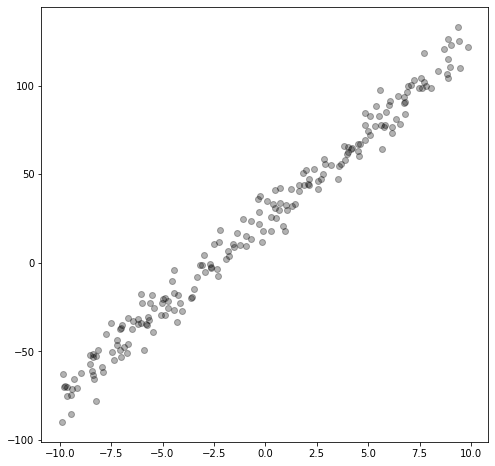

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#load data
path = "data.csv"
data = np.genfromtxt(path, delimiter=',')

x = data[:, 0]
y = data[:, 1]

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.3, c = 'black')
plt.show()

In [0]:
#initialize step_size and theta0,1
step_size=0.00125
theta0 = -30
theta1 = -30

In [0]:
#define linear model 'h'
def func_h(theta0, theta1):
  return theta0 + theta1 * x

In [0]:
#define object function 'j'
def func_j(theta0, theta1, m):
  return (1/2*m) * sum((theta0 + theta1 * x[i] - y[i]) * (theta0 + theta1 * x[i] - y[i]) for i in range(m))

In [0]:
e_values = []
theta0_values = []
theta1_values = []

In [0]:
#Loop while the object function convergence 

while(1):
  j = func_j(theta0, theta1, 200)
  
  theta0 -= step_size * (1/200) * sum((func_h(theta0,theta1)[i] - y[i]) for i in range(200))
  theta1 -= step_size * (1/200) * sum(((func_h(theta0,theta1)[i] - y[i]) * x[i]) for i in range(200))
  
  new_j = func_j(theta0, theta1, 200)

  e_values.append(new_j)
  theta0_values.append(theta0)
  theta1_values.append(theta1)
  
  #until convergence
  if abs(j-new_j) < 0.0000000000000000000001:
    break

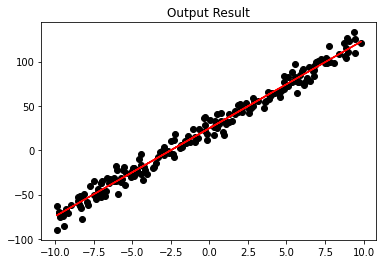

In [9]:
#output result of linear model
plt.title('Output Result')
plt.plot(x, func_h(theta0, theta1), 'r')
plt.scatter(x,y,c='black')
plt.show()

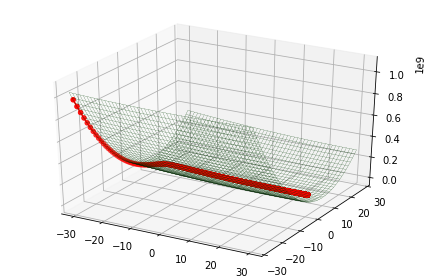

In [20]:
#define x, y, z axis 
X_theta0 = np.arange(-30, 30, 0.1)
Y_theta1 = np.arange(-30, 30, 0.1)
X, Y = np.meshgrid(X_theta0, Y_theta1)
Z = func_j(X, Y, 200)

#plotting surface 
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_wireframe(X, Y, Z,color='green',linewidth=0.1)
wire = ax.plot_wireframe(X, Y, Z,color='black',linewidth=0.1)
fig.tight_layout()

#plotting the path on the energy surface
ax.scatter3D(theta0_values, theta1_values, e_values ,c='red');
ax.plot(theta0_values, theta1_values, e_values, c='red')

#define y-axis range
ax.set_ylim(-30,30)

plt.show()